# Curation Signal Forecasting

In [1]:
# standard imports
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import ols
pd.set_option('display.max_rows', 15)

In [2]:

# function used to query each type of event from The Graph
def query_theGraph_epoch(raw_query, field_name, url, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:endBlock, where:{id:"1"})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:endBlock, where: {endBlock_gt: ' + str(indexer) + '})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['endBlock']
            print(indexer)
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99 and n > 1:
            break
        
    return pd.DataFrame(records)

In [3]:
# function used to query each type of event from The Graph
def query_theGraph_allocation(raw_query, field_name, url, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 1
    records = []
    while n < 506:
        query = 'query '+query_parts[0] + "where:{id:"+str(n)+"})" + query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            print(json.loads(r.content)['data'][field_name])
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        n += 1
        
    return pd.DataFrame(records)

In [4]:
#get subgraphs data
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

epoch_query = '''query{
	epoches(){
    id
    signalledTokens
    stakeDeposited
    totalQueryFees
    curatorQueryFees
    totalRewards
    endBlock
  }
}
'''

field_name = 'epoches'

epoch_df = query_theGraph_epoch(epoch_query, field_name, url, False)

11460060
12131306
12795906
13460506
14125106
14789706
14809644


In [5]:
#get subgraphs data
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

epoch_query = '''query{
	pools(){
    id
    allocation
  }
}
'''

field_name = 'pools'

allocation_df = query_theGraph_allocation(epoch_query, field_name, url, False)

[]
[]
[]
[]
[{'id': '5', 'allocation': '23596259040000000000000000'}]
[{'id': '6', 'allocation': '109623900110000000000000000'}]
[{'id': '7', 'allocation': '144402254060000000000000000'}]
[{'id': '8', 'allocation': '251715101935167316600000000'}]
[{'id': '9', 'allocation': '308248466736156376000000000'}]
[{'id': '10', 'allocation': '220601900120717710000000000'}]
[{'id': '11', 'allocation': '1235126465881094806000000000'}]
[{'id': '12', 'allocation': '493860533861040350000000000'}]
[{'id': '13', 'allocation': '589494440424174000000000000'}]
[{'id': '14', 'allocation': '522075314211140000000000000'}]
[{'id': '15', 'allocation': '887844815436320620000000000'}]
[{'id': '16', 'allocation': '460080071353234890000000000'}]
[{'id': '17', 'allocation': '620181503716238600000000000'}]
[{'id': '18', 'allocation': '1605764519592460000000000000'}]
[{'id': '19', 'allocation': '475399277163839900000000000'}]
[{'id': '20', 'allocation': '703283743259400000000000000'}]
[{'id': '21', 'allocation': '681

In [6]:
allocation_df

,id,allocation
0,5,23596259040000000000000000
1,6,109623900110000000000000000
2,7,144402254060000000000000000
3,8,251715101935167316600000000
4,9,308248466736156376000000000
...,...,...
496,501,275814979170000000000000000
497,502,4822554366930000000000000000
498,503,974436551010000000000000000
499,504,2300385835430000000000000000


In [7]:
epoch_df

,id,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock
0,1,0,10000000000000000000,0,0,0,11460060
1,3,0,2137573000000000000000000,0,0,0,11473352
2,4,244919450103834483981271,72326775000000000000000000,0,0,0,11479998
3,5,0,48119513876353513935471811,0,0,690612880086046382273295,11486644
4,6,0,58229882095246030700280898,0,0,713053968477522628710624,11493290
...,...,...,...,...,...,...,...
499,501,297000000000000000000,1041607276511850509529,0,0,82813295669913321914899,14783060
500,502,23023426149394278110006,328056990049068425245660,0,0,1352304290994334078473565,14789706
501,503,69737279423328708415081,166081422518338150343899,0,0,260552835930068028365288,14796352
502,504,29382034045367375042781,13419066010079638663498,0,0,651614890845064708003067,14802998


In [8]:
epoch_df['id'] = epoch_df['id'].astype(int)
missing_epochs = pd.Index(range(506)).difference(epoch_df.id)
missing_epochs_df = pd.DataFrame(index=missing_epochs, columns=epoch_df.columns).fillna(0.0)
missing_epochs_df['id'] = missing_epochs_df.index
epoch_df
new_epoch_df = pd.concat([epoch_df, missing_epochs_df])
new_epoch_df

,id,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock
0,1,0,10000000000000000000,0,0,0,11460060.0
1,3,0,2137573000000000000000000,0,0,0,11473352.0
2,4,244919450103834483981271,72326775000000000000000000,0,0,0,11479998.0
3,5,0,48119513876353513935471811,0,0,690612880086046382273295,11486644.0
4,6,0,58229882095246030700280898,0,0,713053968477522628710624,11493290.0
...,...,...,...,...,...,...,...
501,503,69737279423328708415081,166081422518338150343899,0,0,260552835930068028365288,14796352.0
502,504,29382034045367375042781,13419066010079638663498,0,0,651614890845064708003067,14802998.0
503,505,9900000000000000000000,22675336586578062009218,0,0,236422921768261313998769,14809644.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
new_epoch_df.sort_values(by='id', inplace=True)
new_epoch_df

,id,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,0,10000000000000000000,0,0,0,11460060.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,2137573000000000000000000,0,0,0,11473352.0
2,4,244919450103834483981271,72326775000000000000000000,0,0,0,11479998.0
...,...,...,...,...,...,...,...
499,501,297000000000000000000,1041607276511850509529,0,0,82813295669913321914899,14783060.0
500,502,23023426149394278110006,328056990049068425245660,0,0,1352304290994334078473565,14789706.0
501,503,69737279423328708415081,166081422518338150343899,0,0,260552835930068028365288,14796352.0
502,504,29382034045367375042781,13419066010079638663498,0,0,651614890845064708003067,14802998.0


In [10]:
new_epoch_df['signalledTokens'] = new_epoch_df['signalledTokens'].astype(float)
new_epoch_df['signalledTokens'] = new_epoch_df['signalledTokens']/10e18
new_epoch_df['stakeDeposited'] = new_epoch_df['stakeDeposited'].astype(float)
new_epoch_df['stakeDeposited'] = new_epoch_df['stakeDeposited']/10e18
new_epoch_df['totalQueryFees'] = new_epoch_df['totalQueryFees'].astype(float)
new_epoch_df['totalQueryFees'] = new_epoch_df['totalQueryFees']/10e18
new_epoch_df['curatorQueryFees'] = new_epoch_df['curatorQueryFees'].astype(float)
new_epoch_df['curatorQueryFees'] = new_epoch_df['curatorQueryFees']/10e18
new_epoch_df['totalRewards'] = new_epoch_df['totalRewards'].astype(float)
new_epoch_df['totalRewards'] = new_epoch_df['totalRewards']/10e18

In [11]:
allocation_df['id'] = allocation_df['id'].astype(int)
missing_allocations = pd.Index(range(506)).difference(allocation_df.id)
missing_allocations_df = pd.DataFrame(index=missing_allocations, columns=allocation_df.columns).fillna(0.0)
missing_allocations_df['id'] = missing_allocations_df.index
allocation_df
new_allocation_df = pd.concat([allocation_df, missing_allocations_df])
new_allocation_df

,id,allocation
0,5,23596259040000000000000000
1,6,109623900110000000000000000
2,7,144402254060000000000000000
3,8,251715101935167316600000000
4,9,308248466736156376000000000
...,...,...
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0


In [12]:
new_allocation_df.sort_values(by='id', inplace=True)
new_allocation_df

,id,allocation
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
496,501,275814979170000000000000000
497,502,4822554366930000000000000000
498,503,974436551010000000000000000
499,504,2300385835430000000000000000


In [13]:
new_allocation_df['allocation'] = new_allocation_df['allocation'].astype(float)
new_allocation_df['allocation'] = new_allocation_df['allocation']/10e18

In [14]:
all_df = pd.merge(new_allocation_df, new_epoch_df)
all_df

,id,allocation,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock
0,0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0
1,1,0.000000e+00,0.000000,1.000000e+00,0.0,0.0,0.000000,11460060.0
2,2,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0
3,3,0.000000e+00,0.000000,2.137573e+05,0.0,0.0,0.000000,11473352.0
4,4,0.000000e+00,24491.945010,7.232678e+06,0.0,0.0,0.000000,11479998.0
...,...,...,...,...,...,...,...,...
501,501,2.758150e+07,29.700000,1.041607e+02,0.0,0.0,8281.329567,14783060.0
502,502,4.822554e+08,2302.342615,3.280570e+04,0.0,0.0,135230.429099,14789706.0
503,503,9.744366e+07,6973.727942,1.660814e+04,0.0,0.0,26055.283593,14796352.0
504,504,2.300386e+08,2938.203405,1.341907e+03,0.0,0.0,65161.489085,14802998.0


In [15]:
all_df.rename({'id': 'epoch'}, axis = 1, inplace = True)

In [16]:
all_df['cumulative_tokens'] = all_df['stakeDeposited'] + all_df['signalledTokens'] + all_df['totalQueryFees'] + all_df['curatorQueryFees'] + all_df['totalRewards'] + all_df['allocation']
all_df['total_supply'] = all_df['cumulative_tokens'].cumsum()
all_df

,epoch,allocation,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock,cumulative_tokens,total_supply
0,0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000e+00
1,1,0.000000e+00,0.000000,1.000000e+00,0.0,0.0,0.000000,11460060.0,1.000000e+00,1.000000e+00
2,2,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00
3,3,0.000000e+00,0.000000,2.137573e+05,0.0,0.0,0.000000,11473352.0,2.137573e+05,2.137583e+05
4,4,0.000000e+00,24491.945010,7.232678e+06,0.0,0.0,0.000000,11479998.0,7.257169e+06,7.470928e+06
...,...,...,...,...,...,...,...,...,...,...
501,501,2.758150e+07,29.700000,1.041607e+02,0.0,0.0,8281.329567,14783060.0,2.758991e+07,1.295412e+11
502,502,4.822554e+08,2302.342615,3.280570e+04,0.0,0.0,135230.429099,14789706.0,4.824258e+08,1.300237e+11
503,503,9.744366e+07,6973.727942,1.660814e+04,0.0,0.0,26055.283593,14796352.0,9.749329e+07,1.301211e+11
504,504,2.300386e+08,2938.203405,1.341907e+03,0.0,0.0,65161.489085,14802998.0,2.301080e+08,1.303513e+11


In [17]:
all_df.to_csv('./total_supply.csv')

In [18]:
curation_df = pd.read_csv('../curation_events/curation_events.csv')
curation_df.drop('Unnamed: 0', axis = 1, inplace = True)
curation_df

,id,blockNumber,signer,type,nameSignal,versionSignal,tokens,subgraphId,subgraphDeploymentID,subgraphversion,subgraphname
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,MintNSignal,279284800875378823397,279284800875378823397,80000000000000000000000,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,MintNSignal,627949250367270370,627949250367270370,360151469700892136118,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,MintNSignal,125503147008134479971,125503147008134479971,88216309708626528177242,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,0xb6916933aa0bac4b6d09260719c4055363642745,MintNSignal,89477475325111327822,89477475325111327822,82622974825605383769993,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
4,0x12925f181018abc41ef4fd32c6e95dab9ff85a6a8337...,11692858,0x4f4538e2553c61bce747f73c5fe8133d4b383dda,MintNSignal,3085781289271725739,3085781289271725739,2000000000000000000000,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
...,...,...,...,...,...,...,...,...,...,...,...
7506,0xdc0c94cb7576fd82b40d94a5f18e46eab340d2070fd6...,14704848,0x79bdd2c976685f500a6e0f601b496acff20b56a7,MintNSignal,99498743710661995473,99498743710661995473,10000000000000000000000,DfD1tZSmDtjCGC2LeYEQbVzj9j8kNqKAQEsYL27Vg6Sw,0x83fc1011f4ab60f6c9e693785c731604affbefbeeccb...,0,Connext Network
7507,0xcb7f61c448b0c42f509dc96047522ee702f1aee07e42...,14705527,0xf6c0366cc3454c259b2d4864fa6bb3874e2590a5,MintNSignal,65671660990071637813,65671660990071637813,28598662055154772118285,7QP7oCLbEAjejkp7wSLTD1zbRMSiDydAmALksBB5E6i1,0xc0bb19a3321ddd3ee6a956bdea9c98e5954feb57d4c2...,0,Loopring zkRollup
7508,0x62d394c215c6ce5725ea35612542c67837b3511b8221...,14707168,0x0b5cf9dc29003890f791553e1e9b447339e35df3,MintNSignal,1407124727947028866,1407124727947028866,2000000000000000000,5gyzN7gutVUnen2mi7HEFdgm9q2vkcaaYd4BBE9GA9WT,0xb952f95b17a00987492361e8aecc1e5e4a7c508b8d5e...,0,cb-extn0502mn
7509,0x4dd275879e57dc2afc1cefd5ff39af9cea1a5c783cdc...,14707641,0x0b5cf9dc29003890f791553e1e9b447339e35df3,MintNSignal,1407124727947028866,1407124727947028866,2000000000000000000,9yhUteMHTNCqydn2gBHcNJ7wERu1KN6H6NJvB9nqi3Fq,0x22df70e1bcbab8f5660ecb9421637a61d7660885991c...,0,cb-ext0502mn2


In [19]:
curation_df['epoch'] = (curation_df['blockNumber'] - 11446768) / 6646
curation_df['epoch'] = curation_df['epoch'].astype(int)

In [20]:
curation_df['tokens'] = curation_df['tokens'].astype(float)
curation_df['tokens'] = curation_df['tokens']/10e18

In [21]:
curation_by_subgraph = {}
for i, j in curation_df.iterrows():
    if j['subgraphId'] not in curation_by_subgraph:
        curation_by_subgraph[j['subgraphname']] = {}
        curation_by_subgraph[j['subgraphname']][j['epoch']] = j['tokens']
    else:
        curation_by_subgraph[j['subgraphname']][j['epoch']] = j['tokens']
curation_by_subgraph_df = pd.DataFrame(curation_by_subgraph)
curation_by_subgraph_df

,PoolTogether,RAI Mainnet,mStable Protocol,UMA Mainnet Voting,Opyn Gamma Mainnet,DODOEX V2,Omen,Audius Network Mainnet,Enzyme Finance,Livepeer,...,Swapr Mainnet,gnosis-safe-mainnet,DODOEX V2 Polygon,UpstreamCollectives,Scab Shop,chainlink-mainnet-ocr,Ampleforth DAO,Connext Network,cb-extn0502mn,cb-ext0502mn2
201,68.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,NaN,NaN,1584.0,NaN,NaN,NaN,NaN,199.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,0.001,0.005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
missing_epochs = pd.Index(range(492)).difference(curation_by_subgraph_df.index)
missing_epochs_df = pd.DataFrame(index=missing_epochs, columns=curation_by_subgraph_df.columns).fillna(0.0)
full_df = pd.concat([curation_by_subgraph_df, missing_epochs_df])

In [23]:
full_df = full_df.sort_index()
full_df = full_df.fillna(0)
full_df

,PoolTogether,RAI Mainnet,mStable Protocol,UMA Mainnet Voting,Opyn Gamma Mainnet,DODOEX V2,Omen,Audius Network Mainnet,Enzyme Finance,Livepeer,...,Swapr Mainnet,gnosis-safe-mainnet,DODOEX V2 Polygon,UpstreamCollectives,Scab Shop,chainlink-mainnet-ocr,Ampleforth DAO,Connext Network,cb-extn0502mn,cb-ext0502mn2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.9,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50.0,0.0,0.0,0.0,0.0,1000.0,0.2,0.2


In [24]:
for i in full_df.columns:
    full_df[i] = full_df[i].cumsum()
full_df

,PoolTogether,RAI Mainnet,mStable Protocol,UMA Mainnet Voting,Opyn Gamma Mainnet,DODOEX V2,Omen,Audius Network Mainnet,Enzyme Finance,Livepeer,...,Swapr Mainnet,gnosis-safe-mainnet,DODOEX V2 Polygon,UpstreamCollectives,Scab Shop,chainlink-mainnet-ocr,Ampleforth DAO,Connext Network,cb-extn0502mn,cb-ext0502mn2
0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,68.5,500.0,1584.0,0.0,0.001,0.005,30.0,199.7,13.1,248.17,...,1000.0,140.0,0.0,0.0,100.0,953.639055,1500.0,0.0,0.0,0.0
488,68.5,500.0,1584.0,0.0,0.001,0.005,30.0,199.7,13.1,248.17,...,1000.0,140.0,0.0,0.0,100.0,953.639055,1500.0,0.0,0.0,0.0
489,68.5,500.0,1584.0,110.0,0.001,0.005,30.0,199.7,13.1,248.17,...,1000.0,140.0,0.0,11.9,100.0,953.639055,1500.0,0.0,0.0,0.0
490,68.5,500.0,1584.0,110.0,0.001,0.005,30.0,199.7,13.1,248.17,...,1000.0,140.0,50.0,11.9,100.0,953.639055,1500.0,1000.0,0.2,0.2


In [25]:
full_df.to_csv('./curation_subgraph.csv')

In [26]:
all_df.head()

,epoch,allocation,signalledTokens,stakeDeposited,totalQueryFees,curatorQueryFees,totalRewards,endBlock,cumulative_tokens,total_supply
0,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,1,0.0,0.00000,1.0,0.0,0.0,0.0,11460060.0,1.000000e+00,1.000000e+00
2,2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00
3,3,0.0,0.00000,213757.3,0.0,0.0,0.0,11473352.0,2.137573e+05,2.137583e+05
4,4,0.0,24491.94501,7232677.5,0.0,0.0,0.0,11479998.0,7.257169e+06,7.470928e+06


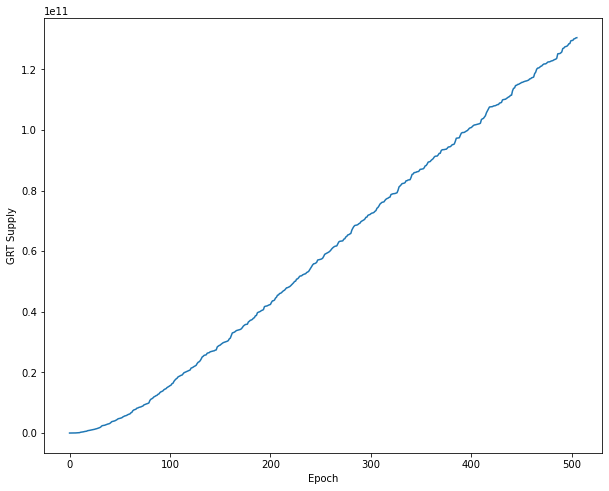

In [27]:
plt.figure(figsize=(10, 8))
all_df.total_supply.plot()
plt.ylabel('GRT Supply')
plt.xlabel('Epoch')
plt.show()

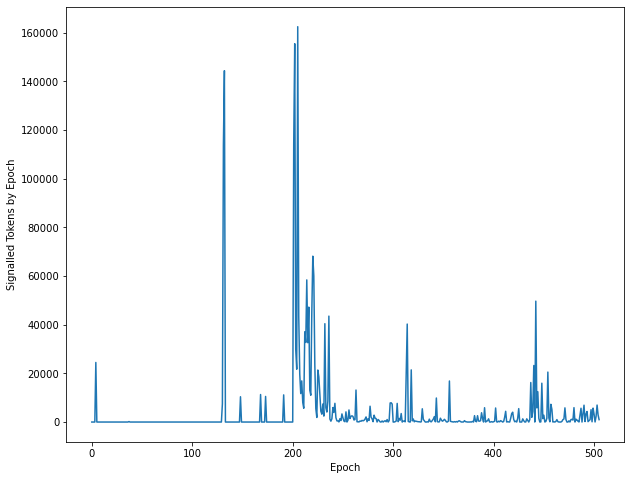

In [28]:
plt.figure(figsize=(10, 8))
all_df.signalledTokens.plot()
plt.ylabel('Signalled Tokens by Epoch')
plt.xlabel('Epoch')
plt.show()

In [29]:
all_df['cumulative_signalledTokens'] = all_df['signalledTokens'].cumsum()
all_df['curation_ratio'] = all_df['total_supply']/all_df['cumulative_signalledTokens']

### Using all_df cumulative tokens over all epochs

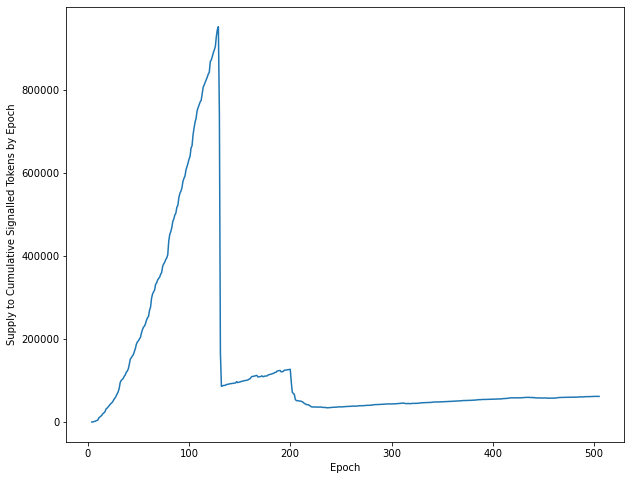

In [30]:
plt.figure(figsize=(10, 8))
all_df.curation_ratio.plot()
plt.ylabel('Supply to Cumulative Signalled Tokens by Epoch')
plt.xlabel('Epoch')
plt.show()

### Using all_df cumulative tokens after the initial test of signal, epoch 230 forward

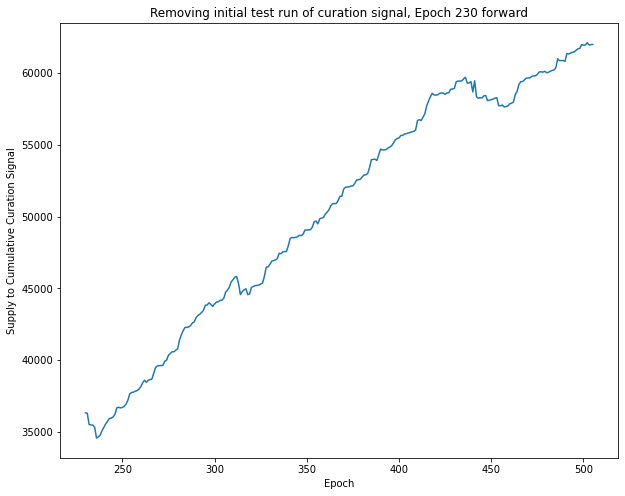

In [31]:
plt.figure(figsize=(10, 8))
plt.plot(all_df.epoch[230:],all_df.curation_ratio[230:])
plt.ylabel('Supply to Cumulative Curation Signal')
plt.xlabel('Epoch')
plt.title('Removing initial test run of curation signal, Epoch 230 forward')
plt.show()

## OLS Linear Regression on Ratio

In [32]:
curation_ratio_model = ols.ols(all_df.curation_ratio[230:],all_df.epoch[230:],'Curation_Signal', ['Epoch'])
curation_ratio_model.b
curation_ratio_model.p
curation_ratio_model.summary()


Dependent Variable: Curation_Signal
Method: Least Squares
Date:  Thu, 19 May 2022
Time:  22:52:48
"# obs:                 276
"# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const           12588.047638      401.925432      31.319361      0.000000
Epoch           102.860924      1.068844      96.235662      0.000000
Models stats                         Residual stats
R-squared             0.971265         Durbin-Watson stat   0.023417
Adjusted R-squared    0.971160         Omnibus stat         75.418771
F-statistic           9261.302561         Prob(Omnibus stat)   0.000000
Prob (F-statistic)    0.000000			JB stat              13.591220
Log likelihood       -2392.925904			Prob(JB)             0.001119
AIC criterion         17.354536         Skew                 0.050118
BIC criterion         17.380770         Kurtosis             1.917504


In [33]:
predicted_line = curation_ratio_model.b
predicted_line

array([12588.04763829,   102.86092368])

In [34]:
def linear_est(x):
    return predicted_line[0]+predicted_line[1]*x
linear_est_v = np.vectorize(linear_est)

In [35]:
epoch_array = np.arange(0, len(all_df))
predicted_array = linear_est_v(epoch_array)

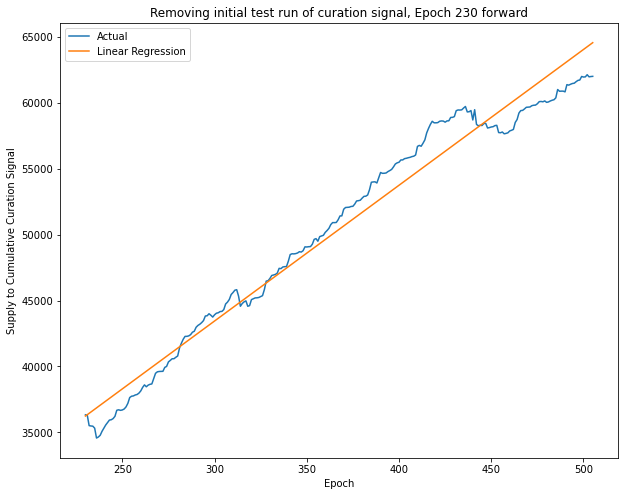

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(all_df.epoch[230:],all_df.curation_ratio[230:], label ="Actual")
plt.plot(all_df.epoch[230:],predicted_array[230:], label ="Linear Regression")
plt.ylabel('Supply to Cumulative Curation Signal')
plt.xlabel('Epoch')
plt.title('Removing initial test run of curation signal, Epoch 230 forward')
plt.legend()
plt.show()

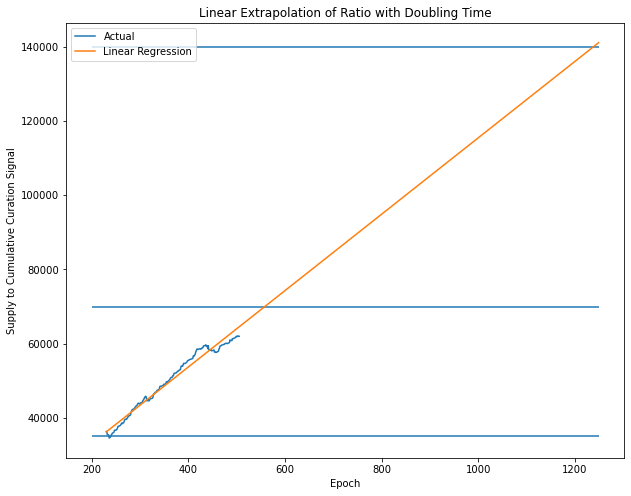

In [37]:
epoch_array = np.arange(0, 1250)
predicted_array = linear_est_v(epoch_array)
plt.figure(figsize=(10, 8))
plt.plot(all_df.epoch[230:],all_df.curation_ratio[230:], label ="Actual")
plt.plot(epoch_array[230:],predicted_array[230:], label ="Linear Regression")
plt.hlines(y=35000, xmin= 200, xmax=1250)
plt.hlines(y=70000, xmin= 200, xmax=1250)
plt.hlines(y=140000, xmin= 200, xmax=1250)
plt.ylabel('Supply to Cumulative Curation Signal')
plt.xlabel('Epoch')
plt.title('Linear Extrapolation of Ratio with Doubling Time')
plt.legend()
plt.show()

### Regression of Curation Signal, while Holding Supply Growth as an Independent Signal

In [38]:
cum_curation_model = ols.ols(all_df.cumulative_signalledTokens[230:],all_df.epoch[230:],'Curation_Signal', ['Epoch'])
cum_curation_model.b
cum_curation_model.p
cum_curation_model.summary()


Dependent Variable: Curation_Signal
Method: Least Squares
Date:  Thu, 19 May 2022
Time:  22:52:49
"# obs:                 276
"# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const           1037250.121109      9324.132922      111.243601      0.000000
Epoch           2052.558288      24.795756      82.778613      0.000000
Models stats                         Residual stats
R-squared             0.961551         Durbin-Watson stat   0.035355
Adjusted R-squared    0.961411         Omnibus stat         23.216330
F-statistic           6852.298800         Prob(Omnibus stat)   0.000009
Prob (F-statistic)    0.000000			JB stat              26.435774
Log likelihood       -3260.696035			Prob(JB)             0.000002
AIC criterion         23.642725         Skew                -0.735986
BIC criterion         23.668960         Kurtosis             2.636598


In [39]:
predicted_line = cum_curation_model.b
def linear_est(x):
    return predicted_line[0]+predicted_line[1]*x
linear_est_v = np.vectorize(linear_est)
epoch_array = np.arange(0, len(all_df))
predicted_array = linear_est_v(epoch_array)
extrap_array = np.arange(0, 1250)
predicted_extrap_array = linear_est_v(extrap_array)


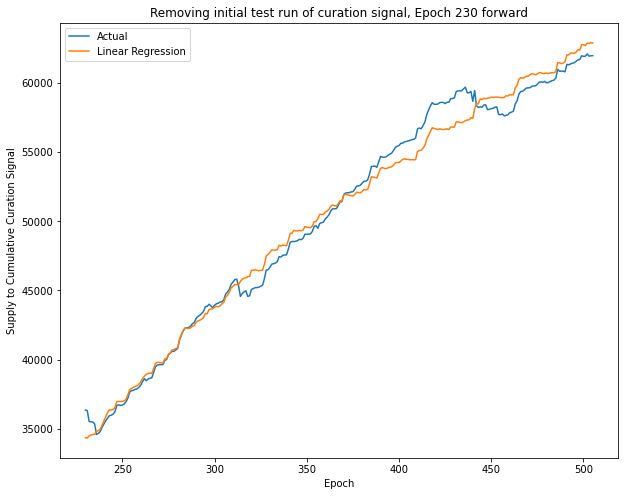

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(all_df.epoch[230:],all_df.curation_ratio[230:], label ="Actual")
plt.plot(all_df.epoch[230:],all_df.total_supply[230:]/predicted_array[230:], label ="Linear Regression")
plt.ylabel('Supply to Cumulative Curation Signal')
plt.xlabel('Epoch')
plt.title('Removing initial test run of curation signal, Epoch 230 forward')
plt.legend()
plt.show()

### For Extrapolation, Perform Independent Regression on Supply

In [41]:
supply_model = ols.ols(all_df.total_supply[230:],all_df.epoch[230:],'Supply', ['Epoch'])
supply_model.b
supply_model.p
supply_model.summary()


Dependent Variable: Supply
Method: Least Squares
Date:  Thu, 19 May 2022
Time:  22:52:49
"# obs:                 276
"# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const          -13543018614.124233      171988885.330939     -78.743569      0.000000
Epoch           286053656.722562      457371.688881      625.429303      0.000000
Models stats                         Residual stats
R-squared             0.999300         Durbin-Watson stat   0.206816
Adjusted R-squared    0.999297         Omnibus stat         4.086358
F-statistic           391161.813416         Prob(Omnibus stat)   0.129616
Prob (F-statistic)    0.000000			JB stat              2.746392
Log likelihood       -5971.727882			Prob(JB)             0.253296
AIC criterion         43.287883         Skew                -0.029631
BIC criterion         43.314118         Kurtosis             2.514918


In [42]:
predicted_supply = supply_model.b
def linear_est(x):
    return predicted_supply[0]+predicted_supply[1]*x
linear_est_v = np.vectorize(linear_est)
extrap_array = np.arange(0, 1250)
predicted_supply_array = linear_est_v(extrap_array)

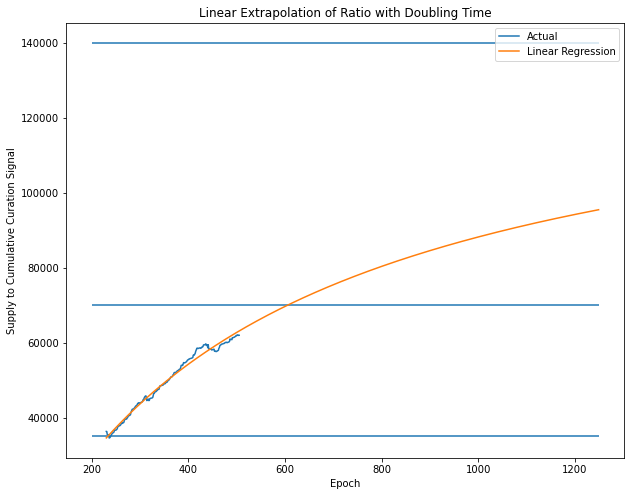

In [43]:
plt.figure(figsize=(10, 8))
plt.plot(all_df.epoch[230:],all_df.curation_ratio[230:], label ="Actual")
plt.plot(extrap_array[230:],predicted_supply_array[230:]/predicted_extrap_array[230:], label ="Linear Regression")
plt.hlines(y=35000, xmin= 200, xmax=1250)
plt.hlines(y=70000, xmin= 200, xmax=1250)
plt.hlines(y=140000, xmin= 200, xmax=1250)
plt.ylabel('Supply to Cumulative Curation Signal')
plt.xlabel('Epoch')
plt.title('Linear Extrapolation of Ratio with Doubling Time')
plt.legend()
plt.show()

## Using curation df

In [44]:
# curation_df['cumulative_signalledTokens'] = curation_df['tokens'].cumsum()
# curation_df['curation_ratio'] = all_df['total_supply']/curation_df['cumulative_signalledTokens']
# plt.figure(figsize=(10, 8))
# curation_df.curation_ratio.plot()
# plt.ylabel('Supply to Cumulative Curation Signal')
# plt.xlabel('Epoch')
# plt.show()